<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Activity/blob/main/ACtivity_Day_14_Kmeans%2C%20ALGOO%2CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The USArrests data set. For each of the 50 states in the United States, the data set contains the number of arrests per 100, 000 residents for each of three crimes: Assault, Murder, and Rape. We also record UrbanPop (the percent of the population in each state living in urban areas).
1. Kmeans for identifying the similar kind of states in crime 
2. HC. 
3. PCA 
4. Explained variance plot 
5 . Kmeans  using principal components
3. HC using principal components


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("USArrests.csv")

In [3]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## **1)-Kmeans for identifying the similar kind of states in crime**

In [6]:
X= data.drop("Unnamed: 0" , axis =1)

355807.8216
96399.02814449917
47964.26535714285
34728.629357142854
24417.02352380952
18768.000666666667
15463.47377777778
13436.825531746035
11405.110476190475
10147.60911904762


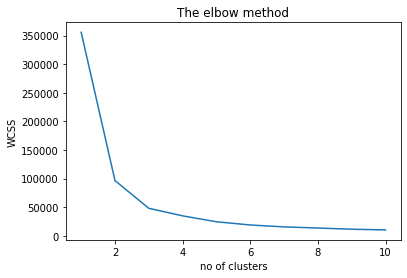

In [7]:
from sklearn.cluster import KMeans

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters = i , init ="k-means++" ,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3 , init ="k-means++" ,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [9]:
kmean_clusters = kmeans.labels_

In [10]:
output = data.copy()
output["kmeans-cluster"] = kmean_clusters
output.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans-cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2


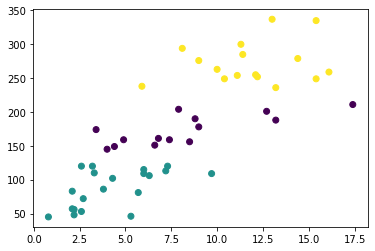

In [11]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmean_clusters)

Below we can see which states are in which clusters

[]

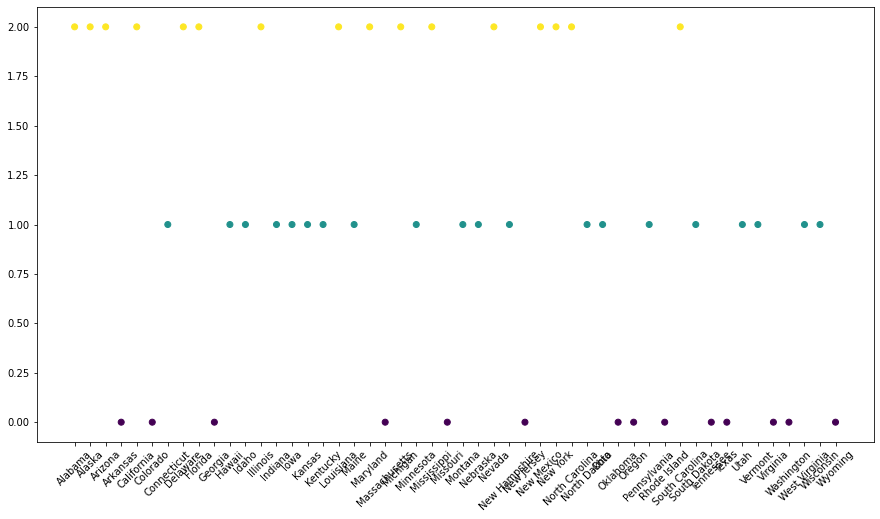

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(data["Unnamed: 0"], kmean_clusters ,c=kmean_clusters)
plt.xticks(rotation=45)
plt.plot()

## **2)-heirarchcal clustering**

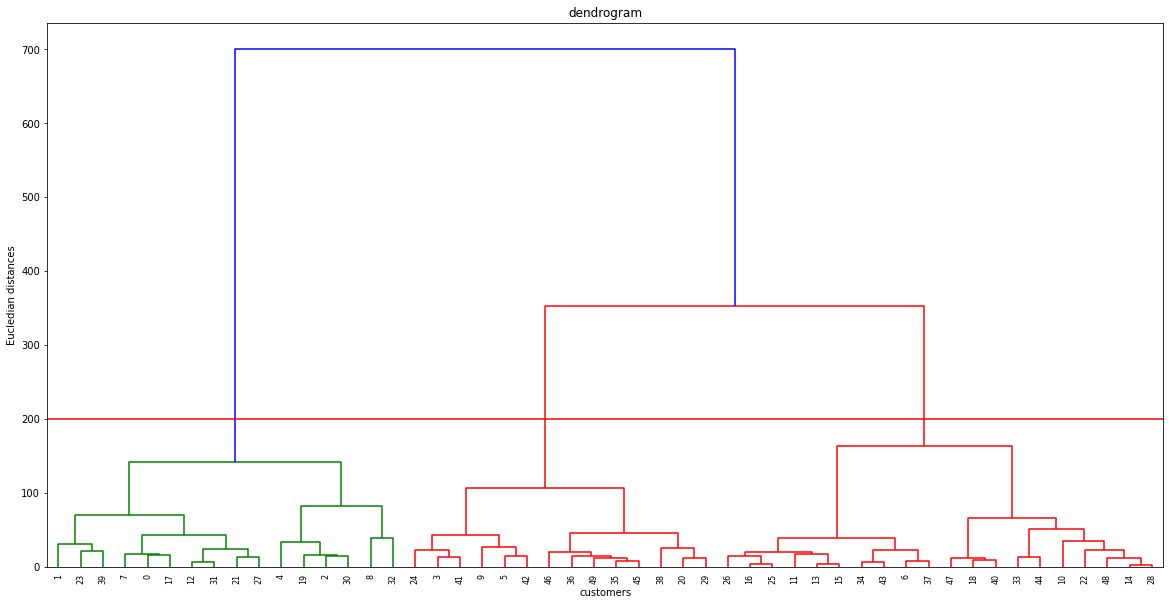

In [13]:
#Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.hlines(200,0,600,colors="red" , linestyles="solid") # for thehorizontal cut line 
plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Eucledian distances")
plt.show()

here we can cut our dendrogam from 200 value , so we get three clusters 

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(X)

HC_clusters = model_hc.labels_

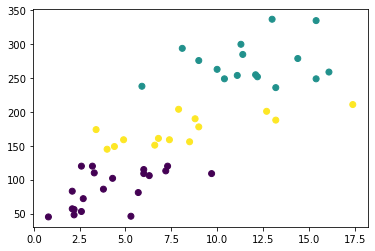

In [20]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=HC_clusters)

In [21]:
output["HC-cluster"] = HC_clusters
output.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans-cluster,HC-cluster
0,Alabama,13.2,236,58,21.2,2,1
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,2,1


## **3)-PCA**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(StandardScaler().fit_transform(X) , columns=X.columns , index=X.index)

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [29]:
pca.n_components

3

## **4)-Explained variance plot**

In [26]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

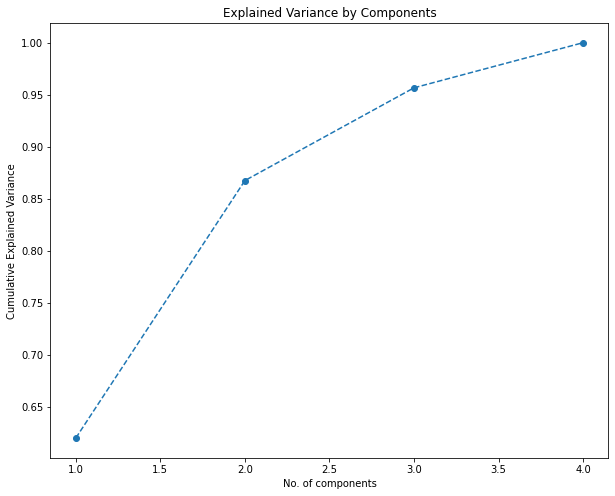

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('No. of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [28]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)

## **5)-Kmeans  using principal components**

191.32849561350832
96.29014089521223
71.54593739735597
49.26235143088732
41.9813705916001
35.84810576041734
32.26146055089379
27.667460368718537
25.165824603917564
21.08623289627195


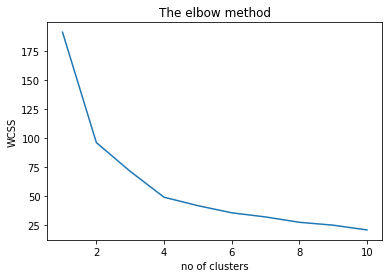

In [30]:
wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters = i , init ="k-means++" ,random_state=42)
  kmeans.fit(scores_pca)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 4 , init ="k-means++" ,random_state=42)
kmeans.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [33]:
pc_Kmean_clusters = kmeans.labels_

In [36]:
X_new = np.array(scores_pca)

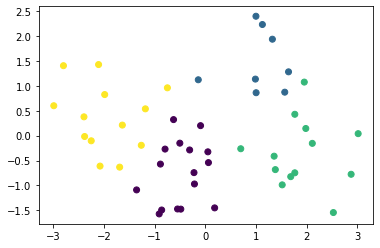

In [37]:
plt.scatter(X_new[:,0],X_new[:,1],c=y_kmeans)

In [35]:
# for a good model the inertia should be low
kmeans.inertia_

49.26235143088732

In [34]:
output["pca-kmeans-cluster"] = pc_Kmean_clusters
output.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans-cluster,HC-cluster,pca-kmeans-cluster
0,Alabama,13.2,236,58,21.2,2,1,1
1,Alaska,10.0,263,48,44.5,2,1,2
2,Arizona,8.1,294,80,31.0,2,1,2


## **6- HC using principal components**

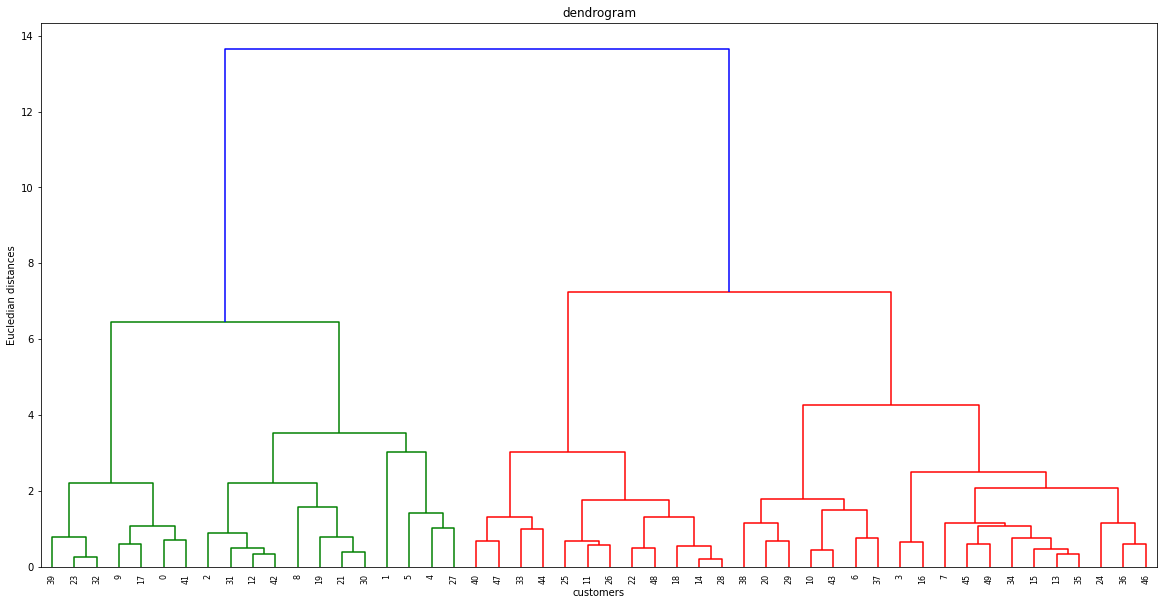

In [38]:
#Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(scores_pca, method = "ward"))

plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Eucledian distances")
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4 , affinity = "euclidean" , linkage = "ward")

y_hc = hc.fit_predict(scores_pca)

In [44]:
clusters_pca_ag =hc.labels_

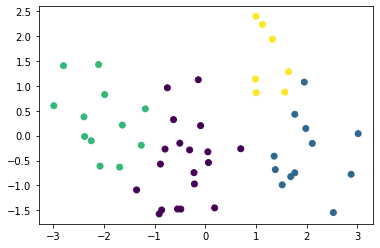

In [40]:
plt.scatter(scores_pca[:,0],scores_pca[:,1],c=y_hc)

In [45]:
output["pca-agg-cluster"] = clusters_pca_ag
output.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans-cluster,HC-cluster,pca-kmeans-cluster,pca-agg-cluster
0,Alabama,13.2,236,58,21.2,2,1,1,3
1,Alaska,10.0,263,48,44.5,2,1,2,1
2,Arizona,8.1,294,80,31.0,2,1,2,1
